In [2]:
%matplotlib inline

from imutils import paths
import argparse
import cv2
from matplotlib import pyplot as plt

In [3]:
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

In [4]:
def get_collective_blur(path, thresh):
    count_b = 0
    count_nb = 0
    avg = 0
    for imagePath in paths.list_images(path):

        image = cv2.imread(imagePath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        fm = variance_of_laplacian(gray)
    
        avg = avg + fm

        if fm < thresh:
            count_b += 1
        else: 
            count_nb += 1

    avg = avg / (count_nb + count_b)

    return count_b, count_nb, avg

In [5]:
def get_accuracy(thresh):
    img_paths = ['Data/Blur_nonBlur/valid/blur/', 'Data/Blur_nonBlur/valid/nonblur/']
    correct = 0
    total = 0

    for i in range(len(img_paths)):
        
        path = img_paths[i]
        count_b, count_nb, avg = get_collective_blur(path, thresh)

        total = total + (count_b + count_nb)
        correct = correct + (count_b if i is 0 else count_nb)

        print('\nFor {}:'.format(path))
        print(
            'avg: ', avg,
            '\ncount_b: ', count_b,
            '\ncount_nb: ', count_nb
        )

    accuracy = correct / total
    return accuracy

In [10]:
def get_max_acc():
    max_acc = 0
    max_thresh = 0
    acc_list = []
    thresh_list = []
    for thresh in range(30, 120, 5):
        print('*' * 10)
        print('For thresh = {}:'.format(thresh))
        acc = get_accuracy(thresh)
        acc_list.append(acc)
        thresh_list.append(thresh)
        if acc > max_acc:
            max_thresh = thresh
            max_acc = acc

    print(
        '\nMax_Acc:', max_acc,
        '\nMax_thresh:', max_thresh
    )

    plt.plot(thresh_list, acc_list)
    plt.show()

**********
For thresh = 30:

For Data/Blur_nonBlur/valid/blur/:
avg:  73.03134172486948 
count_b:  77 
count_nb:  76

For Data/Blur_nonBlur/valid/nonblur/:
avg:  301.0713856328762 
count_b:  0 
count_nb:  152
**********
For thresh = 35:

For Data/Blur_nonBlur/valid/blur/:
avg:  73.03134172486948 
count_b:  81 
count_nb:  72

For Data/Blur_nonBlur/valid/nonblur/:
avg:  301.0713856328762 
count_b:  0 
count_nb:  152
**********
For thresh = 40:

For Data/Blur_nonBlur/valid/blur/:
avg:  73.03134172486948 
count_b:  86 
count_nb:  67

For Data/Blur_nonBlur/valid/nonblur/:
avg:  301.0713856328762 
count_b:  0 
count_nb:  152
**********
For thresh = 45:

For Data/Blur_nonBlur/valid/blur/:
avg:  73.03134172486948 
count_b:  91 
count_nb:  62

For Data/Blur_nonBlur/valid/nonblur/:
avg:  301.0713856328762 
count_b:  3 
count_nb:  149
**********
For thresh = 50:

For Data/Blur_nonBlur/valid/blur/:
avg:  73.03134172486948 
count_b:  93 
count_nb:  60

For Data/Blur_nonBlur/valid/nonblur/:
avg:  30

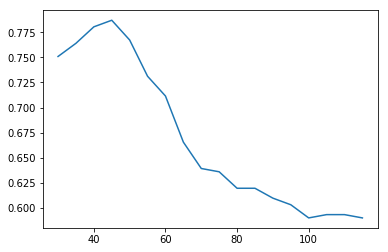

In [11]:
get_max_acc()

In [ ]:
plt